## Plotting Genes of interest Biase2014Cellfateinclination

GEO: GSE57249
http://www.genome.org/cgi/doi/10.1101/gr.177725.114.

Biase2014Cellfateinclination

Cell fate inclination within 2-cell and 4-cell mouse
embryos revealed by single-cell RNA sequencing
Fernando H. Biase, Xiaoyi Cao, and Sheng Zhong
2014 Genome Research

#### load modules

In [18]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.cluster.hierarchy as sch
import seaborn as sns

import pylab
from pylab import *

## load data

In [20]:
df_Biase = pd.read_table('./TE-ICM-Blastocyst_Biase2014.txt').set_index('Gene')
df_Biase[:2]#.set_axis(('Gene', E), axis=1)

,ICM1,ICM2,ICM3,ICM4,TE1,TE2,TE3
Gene,,,,,,,
Oct4,95.3039,288.556,446.761,292.712,69.3088,68.88400,25.489900
Nanog,26.4029,82.825,181.072,101.791,0.0000,5.32735,0.265683


In [21]:
df_Heatmap = df_Biase

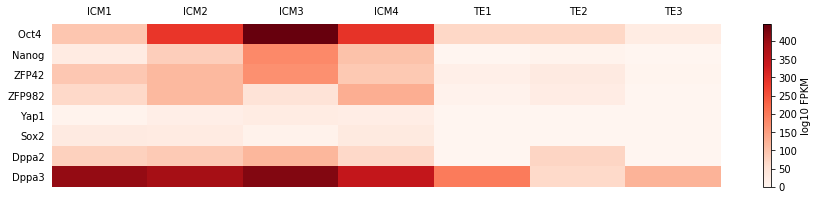

In [22]:
df_plotme = df_Heatmap#.sort_values(by=['gene_name'], ascending=[True], inplace=False)

column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(15, 3))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
#fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

In [33]:
log10_df_Heatmap = np.log10(df_Heatmap + 0.000001)
log10_df_Heatmap[:2]

,ICM1,ICM2,ICM3,ICM4,TE1,TE2,TE3
Gene,,,,,,,
Oct4,1.979111,2.460230,2.650075,2.466441,1.840788,1.838118,1.406368
Nanog,1.421652,1.918161,2.257851,2.007709,-6.000000,0.726511,-0.575635


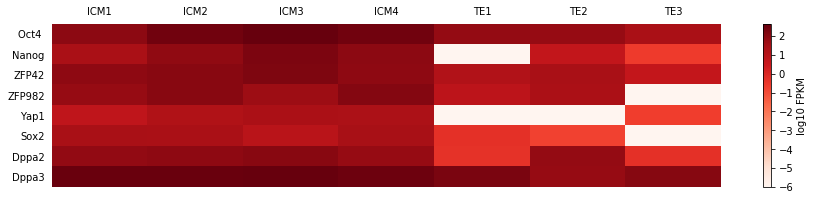

In [34]:
df_plotme = log10_df_Heatmap#

column_labels = df_plotme.index #CGNP.axes[0]
row_labels = df_plotme.columns[:] #CGNP.axes[1]
data = df_plotme.values[:,:]

# figure size
#plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(figsize=(15, 3))

# color scheme
heatmap = ax.pcolormesh(data, cmap='Reds', alpha=1) # plt.cm.bwr
    
# add colorbar
fig.colorbar(heatmap, ax=ax, label='log10 FPKM')#, ax=ax)

# put the major ticks at the middle of each cell, notice "reverse" use of dimension
ax.set_yticks(np.arange(data.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(data.shape[1])+0.5, minor=False)
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(column_labels, minor=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
#plt.xticks(rotation=90)

#no frame
ax.set_frame_on(False)

# Turn off all the ticks
ax = plt.gca()
for t in ax.xaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
for t in ax.yaxis.get_major_ticks():
    t.tick1line.set_visible(False)
    t.tick2line.set_visible(False)
    
plt.show()
#fig.savefig("RIC-Heatmap.jpg", dpi=300)
#fig.savefig("Prot15-Heatmap.svg", dpi=300)
#fig.savefig("RIC-Heatmap.pdf", dpi=300)

## Clustering
with seaborn

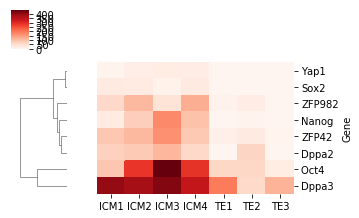

In [47]:
sns.clustermap(df_Heatmap, 
              #metric="correlation",
               col_cluster=False,
               #standard_scale=1,
               cmap='Reds',
               figsize=(5, 3)
               yticklabels=False
              )
plt.savefig("FPKM-Heatmap-Biase-All-cluster.svg", dpi=300)
plt.savefig("FPKM-Heatmap-Biase-All-cluster.png", dpi=300)

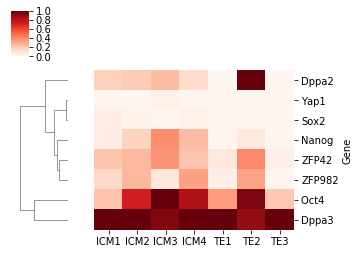

In [39]:
sns.clustermap(df_Heatmap, 
               #metric="correlation",
               col_cluster=False,
               standard_scale=1,
               cmap='Reds',
               figsize=(5, 3.5)
               #yticklabels=False
              )
plt.savefig("FPKM-Heatmap-Biase-All-cluster-to1.svg", dpi=300)
plt.savefig("FPKM-Heatmap-Biase-All-cluster-to1.png", dpi=300)#

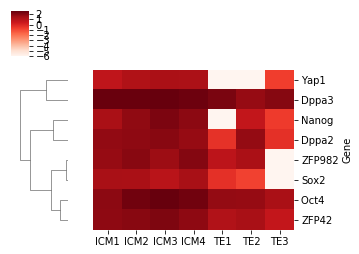

In [40]:
sns.clustermap(log10_df_Heatmap, 
               metric="correlation",
               col_cluster=False,
               #standard_scale=1,
               cmap='Reds',
               figsize=(5, 3.5)
               #yticklabels=False
              )
#plt.savefig("log10-FPKM-Heatmap-Biase-All-cluster.svg", dpi=300)
#plt.savefig("log10-FPKM-Heatmap-Biase-All-cluster.png", dpi=300)